In [ ]:
import sqlite3
import time

def drop_table_if_exists(conn):
    
    drop_sql = "DROP TABLE IF EXISTS jobs;"
    with conn:
        conn.execute(drop_sql)

def create_table_if_not_exists(conn):
    
    create_table_sql = """
    CREATE TABLE IF NOT EXISTS jobs (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        title TEXT,
        company_name TEXT,
        income_text TEXT,
        average_income REAL,
        location TEXT,
        is_inexperienced_ok INTEGER
    );
    """
    with conn:
        conn.execute(create_table_sql)


def store_data_in_db(connection, cursor, jobs_data):
    

    for idx, job in enumerate(jobs_data, start=1):
        try:
        
            inexperienced_flag = 1 if job.get('is_inexperienced_ok') else 0

            title = job.get('title')
            if not isinstance(title, str):
                title = str(title) if title is not None else ""
         
            title = title.encode("utf-8","replace").decode("utf-8","replace")

            company_name = job.get('company_name')
            if not isinstance(company_name, str):
                company_name = str(company_name) if company_name is not None else ""
            company_name = company_name.encode("utf-8","replace").decode("utf-8","replace")

            income_text = job.get('income_text')
            if not isinstance(income_text, str):
                income_text = str(income_text) if income_text is not None else ""
            income_text = income_text.encode("utf-8","replace").decode("utf-8","replace")

            avg = job.get('average_income')
            try:
                average_income = float(avg)
            except:
                average_income = None

            location = job.get('location')
            if not isinstance(location, str):
                location = str(location) if location is not None else ""
            location = location.encode("utf-8","replace").decode("utf-8","replace")

            cursor.execute(insert_sql, (
                title,
                company_name,
                income_text,
                average_income,
                location,
                inexperienced_flag
            ))

        except Exception as e:
            print(f"[ERROR] Failed at record #{idx}")
            print("Job data:", job)
            print("Error message:", repr(e))
            print("-" * 60)
            pass

    connection.commit()


def main():
    all_jobs_data = [
        {
            'title': 'エンジニア募集',
            'company_name': 'ABC株式会社',
            'income_text': '月給25万円',
            'average_income': 25.0,
            'location': '東京都',
            'is_inexperienced_ok': True
        },
        {
            'title': None,
            'company_name': 'XYZ株式会社',
            'income_text': '未入力',
            'average_income': 22.5,
            'location': '大阪府',
            'is_inexperienced_ok': False
        },
        {
            'title': '文字化けテスト\udc9c',
            'company_name': '???',
            'income_text': '月給30万円以上',
            'average_income': 'thirty',
            'location': ['リスト型'],
            'is_inexperienced_ok': True
        }
    ]

    conn = sqlite3.connect("jobs.db")
    cur = conn.cursor()

    drop_table_if_exists(conn)

    create_table_if_not_exists(conn)

    store_data_in_db(conn, cur, all_jobs_data)

    conn.close()


if __name__ == "__main__":
    main()

In [ ]:
import sqlite3
import time

def get_connection(db_path="jobs.db"):
    
    conn = sqlite3.connect(db_path, timeout=10)
    conn.execute("PRAGMA busy_timeout = 5000;")  
    return conn

def drop_table_if_exists(conn):
    
    drop_sql = "DROP TABLE IF EXISTS jobs;"
    with conn:
        conn.execute(drop_sql)

def create_table_if_not_exists(conn):
    
    create_table_sql = """
    CREATE TABLE IF NOT EXISTS jobs (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        title TEXT,
        company_name TEXT,
        income_text TEXT,
        average_income REAL,
        location TEXT,
        is_inexperienced_ok INTEGER,
        is_no_education_required INTEGER
    );
    """
    with conn:
        conn.execute(create_table_sql)

def store_data_in_db(conn, jobs_data):
   
    insert_sql = """
    INSERT INTO jobs (
        title, 
        company_name, 
        income_text, 
        average_income, 
        location, 
        is_inexperienced_ok,
        is_no_education_required
    ) VALUES (?, ?, ?, ?, ?, ?, ?)
    """

    cursor = conn.cursor()

    for idx, job in enumerate(jobs_data, start=1):
        try:
            
            inexperienced_flag = 1 if job.get('is_inexperienced_ok') else 0
            
            no_education_flag = 1 if job.get('is_no_education_required') else 0

            title = job.get('title')
            if not isinstance(title, str):
                title = str(title) if title is not None else ""
          
            title = title.encode("utf-8", "replace").decode("utf-8", "replace")

            company_name = job.get('company_name')
            if not isinstance(company_name, str):
                company_name = str(company_name) if company_name is not None else ""
            company_name = company_name.encode("utf-8", "replace").decode("utf-8", "replace")

            income_text = job.get('income_text')
            if not isinstance(income_text, str):
                income_text = str(income_text) if income_text is not None else ""
            income_text = income_text.encode("utf-8", "replace").decode("utf-8", "replace")

            avg = job.get('average_income')
            try:
                average_income = float(avg)
            except:
                average_income = None

            location = job.get('location')
            if not isinstance(location, str):
                location = str(location) if location is not None else ""
            location = location.encode("utf-8", "replace").decode("utf-8", "replace")

            cursor.execute(insert_sql, (
                title,
                company_name,
                income_text,
                average_income,
                location,
                inexperienced_flag,
                no_education_flag
            ))

        except Exception as e:
            print(f"[ERROR] Failed at record #{idx}")
            print("Job data:", job)
            print("Error message:", repr(e))
            print("-" * 60)
            
            pass

    conn.commit()

def main():
    
    all_jobs_data = [
        {
            'title': 'エンジニア募集',
            'company_name': 'ABC株式会社',
            'income_text': '月給25万円',
            'average_income': 25.0,
            'location': '東京都',
            'is_inexperienced_ok': True,
            'is_no_education_required': False 
        },
        {
            'title': None,
            'company_name': 'XYZ株式会社',
            'income_text': '未入力',
            'average_income': 22.5,
            'location': '大阪府',
            'is_inexperienced_ok': False,
            'is_no_education_required': True  
        },
        {
            
            'title': '文字化けテスト\udc9c',
            'company_name': '???',
            'income_text': '月給30万円以上',
        
            'average_income': 'thirty',
    
            'location': ['リスト型'],
            'is_inexperienced_ok': True,
            'is_no_education_required': True
        }
    ]

    conn = None
    try:

        conn = get_connection("jobs.db")

        drop_table_if_exists(conn)

        create_table_if_not_exists(conn)

        store_data_in_db(conn, all_jobs_data)

        print("データのINSERTが完了しました。")

    except sqlite3.OperationalError as op_err:
        print("[OperationalError] データベースがロック中または別のエラーです。:", op_err)

    except Exception as e:
        print("[ERROR]", e)

    finally:
        if conn is not None:
            conn.close()
            print("データベース接続をクローズしました。")

if __name__ == "__main__":
    main()

データのINSERTが完了しました。
データベース接続をクローズしました。


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import time
import sqlite3

def get_average_income(income_text):
    """
    エン転職の求人票にある給与表示を例に、平均月給を推定する関数。
    ※「月給30万円以上」「月給30万円～55万円＋賞与年2回」などを簡易的に解析し、
      月給の範囲があればその平均値を返すようにしています。
      サイトの表記揺れにより取得精度は左右されるので、必要に応じて調整してください。
    """
    range_pattern = r'月給\s*([0-9]+)\s*万円.*([0-9]+)\s*万円'
    m_range = re.search(range_pattern, income_text)
    if m_range:
        low = int(m_range.group(1))
        high = int(m_range.group(2))
        return (low + high) / 2.0

    single_pattern = r'月給\s*([0-9]+)\s*万円'
    m_single = re.search(single_pattern, income_text)
    if m_single:
        return float(m_single.group(1))

    return None

def parse_job_card(job_card):
    """
    1つの求人ブロック(<div class="jobSearchListUnit">...)から
    タイトルや会社名、給与など必要な情報を抜き出して辞書にまとめる。
    """
    entire_text = job_card.get_text()

    title_tag = job_card.select_one('h2.jobNameText')
    title = title_tag.get_text(strip=True) if title_tag else ""

    company_tag = job_card.select_one('div.companyName span.company')
    company_name = company_tag.get_text(strip=True) if company_tag else ""

    income_li = job_card.select_one('li.data:has(.icon_income) .text')
    income_text = income_li.get_text(strip=True) if income_li else ""
    average_income = get_average_income(income_text)

    location_li = job_card.select_one('li.data:has(.icon_area) .text')
    location_text = location_li.get_text(strip=True) if location_li else ""

    inexperience_spans = job_card.select('span.icon_inexperience')
    is_inexperienced_ok = (len(inexperience_spans) > 0)

    is_no_education_required = ("学歴不問" in entire_text)

    return {
        'title': title,
        'company_name': company_name,
        'income_text': income_text,
        'average_income': average_income,
        'location': location_text,
        'is_inexperienced_ok': is_inexperienced_ok,
        'is_no_education_required': is_no_education_required
    }

def create_table_in_db(cursor):
    """
    jobsテーブルが存在しない場合は作成し、
    既にある場合はテーブル内のレコードを削除して初期化する。
    """
    create_table_sql = """
    CREATE TABLE IF NOT EXISTS jobs (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        title TEXT,
        company_name TEXT,
        income_text TEXT,
        average_income REAL,
        location TEXT,
        is_inexperienced_ok INTEGER,
        is_no_education_required INTEGER
    )
    """
    cursor.execute(create_table_sql)
    cursor.execute("DELETE FROM jobs")

def store_data_in_db(connection, cursor, jobs_data):
    """
    取得した求人データ(jobs_data)をDBに挿入する。
    """
    insert_sql = """
    INSERT INTO jobs (
        title, 
        company_name, 
        income_text, 
        average_income, 
        location, 
        is_inexperienced_ok,
        is_no_education_required
    ) VALUES (?, ?, ?, ?, ?, ?, ?)
    """
    for job in jobs_data:
        inexperienced_flag = 1 if job['is_inexperienced_ok'] else 0
        no_education_flag  = 1 if job['is_no_education_required'] else 0
        cursor.execute(insert_sql, (
            job['title'],
            job['company_name'],
            job['income_text'],
            job['average_income'],
            job['location'],
            inexperienced_flag,
            no_education_flag
        ))
    
    connection.commit()

def calc_mean_income_by_education_flag(cursor, is_no_education_required=True):
    """
    DBから対象レコードをSELECTし、平均月給(average_income)を算出して返す。
    is_no_education_required=Trueの場合は「学歴不問の文言がある求人」のみ、
    Falseの場合は「学歴不問とは書かれていない求人」で絞り込む。
    """
    education_flag = 1 if is_no_education_required else 0
    sql = """SELECT AVG(average_income) FROM jobs
             WHERE is_no_education_required=? 
             AND average_income IS NOT NULL"""
    cursor.execute(sql, (education_flag,))
    row = cursor.fetchone()
    return row[0]  

def calc_mean_income_from_db(cursor, is_inexperienced=True):
    """
    DBから対象レコードをSELECTし、平均月給(average_income)を算出して返す。
    is_inexperienced=Trueの場合は未経験歓迎求人、Falseの場合はそれ以外。
    """
    inexperienced_flag = 1 if is_inexperienced else 0
    sql = """SELECT AVG(average_income) FROM jobs 
             WHERE is_inexperienced_ok=? 
             AND average_income IS NOT NULL"""
    cursor.execute(sql, (inexperienced_flag,))
    row = cursor.fetchone()
    return row[0]

def main():
    all_jobs_data = []

    conn = sqlite3.connect('jobs.db')
    cur = conn.cursor()
    create_table_in_db(cur)

    for page_num in range(1, 113):
        url = f"https://employment.en-japan.com/search/search_list/?areaid=23&page={page_num}"
        resp = requests.get(url)

        if not resp.ok:
            print(f"Page {page_num} HTTP Error: {resp.status_code}")
            continue

        soup = BeautifulSoup(resp.text, 'html.parser')

        job_cards = soup.select('div.jobSearchListUnit')
        if not job_cards:
            print(f"Page {page_num}: No job cards found.")
            continue

        page_jobs_data = [parse_job_card(card) for card in job_cards]
        all_jobs_data.extend(page_jobs_data)

        print(f"Page {page_num} done. Jobs found: {len(page_jobs_data)}")

        time.sleep(0.5)

    store_data_in_db(conn, cur, all_jobs_data)

    cur.execute("SELECT COUNT(*) FROM jobs")
    total_jobs = cur.fetchone()[0]

    avg_inexperienced = calc_mean_income_from_db(cur, True)  
    avg_experienced   = calc_mean_income_from_db(cur, False)

    cur.execute("SELECT COUNT(*) FROM jobs WHERE is_inexperienced_ok=1")
    inexperienced_count = cur.fetchone()[0]
    experienced_count = total_jobs - inexperienced_count

    avg_no_education = calc_mean_income_by_education_flag(cur, True)  
    avg_with_education = calc_mean_income_by_education_flag(cur, False)  

    cur.execute("SELECT COUNT(*) FROM jobs WHERE is_no_education_required=1")
    no_edu_count = cur.fetchone()[0]
    edu_required_count = total_jobs - no_edu_count

    def show_or_na(value):
        return f"{value:.1f} 万円" if value else "データなし"

    print("========================================")
    print(f"Total pages crawled       : 1 ～ 112")
    print(f"Total job cards collected : {total_jobs}")
    print(f"未経験歓迎求人            : {inexperienced_count} 件")
    print(f"それ以外の求人            : {experienced_count} 件\n")

    print(f"■未経験歓迎求人の推定平均月給: {show_or_na(avg_inexperienced)}")
    print(f"■その他求人の推定平均月給    : {show_or_na(avg_experienced)}")

    print("========================================")
    print(f"学歴不問求人             : {no_edu_count} 件")
    print(f"学歴不問以外の求人       : {edu_required_count} 件\n")

    print(f"■学歴不問求人の推定平均月給  : {show_or_na(avg_no_education)}")
    print(f"■学歴条件あり(?)の平均月給   : {show_or_na(avg_with_education)}")

    cur.close()
    conn.close()

if __name__ == "__main__":
    main()

Page 1 done. Jobs found: 54
Page 2 done. Jobs found: 55
Page 3 done. Jobs found: 55
Page 4 done. Jobs found: 55
Page 5 done. Jobs found: 55
Page 6 done. Jobs found: 55
Page 7 done. Jobs found: 55
Page 8 done. Jobs found: 55
Page 9 done. Jobs found: 55
Page 10 done. Jobs found: 55
Page 11 done. Jobs found: 55
Page 12 done. Jobs found: 55
Page 13 done. Jobs found: 55
Page 14 done. Jobs found: 55
Page 15 done. Jobs found: 55
Page 16 done. Jobs found: 55
Page 17 done. Jobs found: 55
Page 18 done. Jobs found: 55
Page 19 done. Jobs found: 55
Page 20 done. Jobs found: 55
Page 21 done. Jobs found: 55
Page 22 done. Jobs found: 55
Page 23 done. Jobs found: 55
Page 24 done. Jobs found: 54
Page 25 done. Jobs found: 55
Page 26 done. Jobs found: 55
Page 27 done. Jobs found: 55
Page 28 done. Jobs found: 55
Page 29 done. Jobs found: 55
Page 30 done. Jobs found: 55
Page 31 done. Jobs found: 55
Page 32 done. Jobs found: 55
Page 33 done. Jobs found: 55
Page 34 done. Jobs found: 55
Page 35 done. Jobs foun

/var/folders/rf/gw7rg5j57fbc_wwwdyr56jh40000gn/T/ipykernel_50326/1683138867.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="Set2")


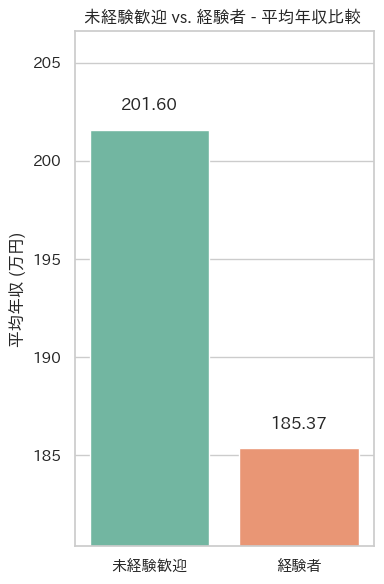

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib  

def main():
    conn = sqlite3.connect("jobs.db")
    df_jobs = pd.read_sql_query("SELECT * FROM jobs", conn)
    conn.close()

    df_filtered = df_jobs[
        (df_jobs["average_income"].notnull()) &
        (df_jobs["average_income"] > 0)
    ].copy()

    df_filtered["is_inexperienced_ok"] = df_filtered["is_inexperienced_ok"].fillna(0)

    df_filtered["annual_income"] = df_filtered["average_income"] * 12

    inexperienced_mean = df_filtered[df_filtered["is_inexperienced_ok"] == 1]["annual_income"].mean()
    others_mean = df_filtered[df_filtered["is_inexperienced_ok"] != 1]["annual_income"].mean()

    labels = ["未経験歓迎", "経験者"]
    values = [inexperienced_mean, others_mean]

    plt.figure(figsize=(4, 6))
    sns.barplot(x=labels, y=values, palette="Set2")

    for i, v in enumerate(values):
        plt.text(i, v + 1, f"{v:.2f}", ha="center", fontweight='bold')

    min_val = min(values)
    max_val = max(values)
    y_min = min_val - 5  
    y_max = max_val + 5  
    plt.ylim(y_min, y_max)

    plt.title("未経験歓迎 vs. 経験者 - 平均年収比較 ")
    plt.xlabel("")
    plt.ylabel("平均年収 (万円)")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

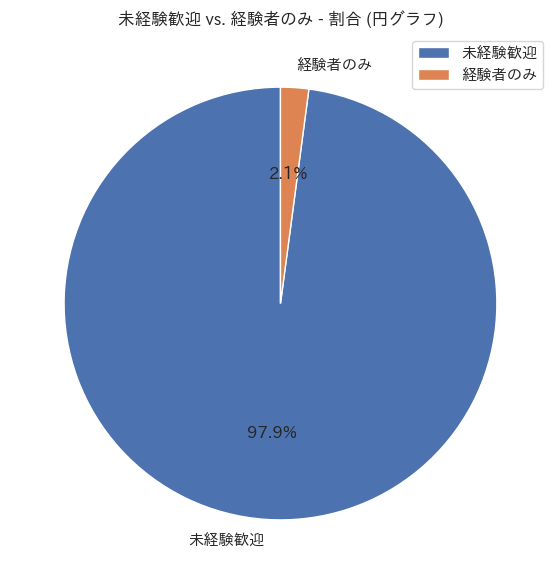

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def main():
   
    conn = sqlite3.connect("jobs.db")
    df_jobs = pd.read_sql_query("SELECT * FROM jobs", conn)
    conn.close()

    df_jobs["inexperienced_label"] = df_jobs["is_inexperienced_ok"].map({
        1: "未経験歓迎",
        0: "経験者のみ"
    })

    count_series = df_jobs["inexperienced_label"].value_counts()

    plt.figure(figsize=(6,6))
    count_series.plot(
        kind="pie",
        autopct="%1.1f%%",
        startangle=90,         
        legend=True           
    )
    plt.title("未経験歓迎 vs. 経験者のみ - 割合 (円グラフ)")
    plt.ylabel("")  
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

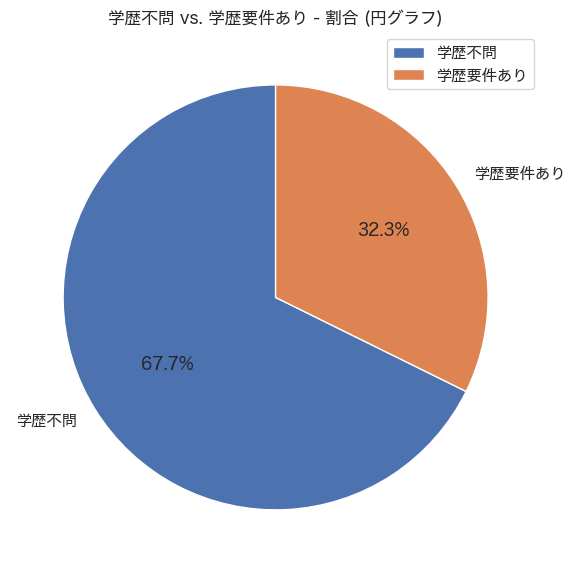

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  

def main():
   
    plt.rcParams["font.family"] = "Hiragino Sans"

    conn = sqlite3.connect("jobs.db")
    df_jobs = pd.read_sql_query("SELECT * FROM jobs", conn)
    conn.close()

    df_jobs["no_education_label"] = df_jobs["is_no_education_required"].map({
        1: "学歴不問",
        0: "学歴要件あり"
    })

    count_series = df_jobs["no_education_label"].value_counts()

    plt.figure(figsize=(6, 6))
    count_series.plot(
        kind="pie",
        autopct="%1.1f%%",  
        startangle=90,     
        legend=True        
    )

    plt.title("学歴不問 vs. 学歴要件あり - 割合 (円グラフ)")
    plt.ylabel("") 
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import sqlite3

def ensure_is_academic_requirement_ok_column(db_path="jobs.db"):
    """
    jobs テーブルに 'is_academic_requirement_ok' カラムが無ければ追加する。
    """
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    cursor.execute("PRAGMA table_info(jobs);")
    columns_info = cursor.fetchall()

    col_names = [col[1] for col in columns_info]
    
    if "is_academic_requirement_ok" not in col_names:
        print("[INFO] 'is_academic_requirement_ok' カラムが見つからないため、追加します。")
        cursor.execute("""
            ALTER TABLE jobs
            ADD COLUMN is_academic_requirement_ok INTEGER DEFAULT 0
        """)
        conn.commit()
    else:
        print("[INFO] 'is_academic_requirement_ok' カラムは既に存在します。")

    conn.close()

if __name__ == "__main__":
    ensure_is_academic_requirement_ok_column()

[INFO] 'is_academic_requirement_ok' カラムが見つからないため、追加します。


In [40]:
import sqlite3

conn = sqlite3.connect("jobs.db")
cursor = conn.cursor()

cursor.execute("PRAGMA table_info(jobs);")
columns_info = cursor.fetchall()
conn.close()

print("jobsテーブルのカラム一覧:")
for col in columns_info:
    print(col)

jobsテーブルのカラム一覧:
(0, 'id', 'INTEGER', 0, None, 1)
(1, 'title', 'TEXT', 0, None, 0)
(2, 'company_name', 'TEXT', 0, None, 0)
(3, 'income_text', 'TEXT', 0, None, 0)
(4, 'average_income', 'REAL', 0, None, 0)
(5, 'location', 'TEXT', 0, None, 0)
(6, 'is_inexperienced_ok', 'INTEGER', 0, None, 0)
(7, 'is_no_education_required', 'INTEGER', 0, None, 0)
(8, 'is_academic_requirement_ok', 'INTEGER', 0, '0', 0)


In [ ]:
def set_academic_requirement_flag(db_path="jobs.db"):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    cursor.execute("""
        UPDATE jobs
        SET is_academic_requirement_ok = 1
        WHERE title LIKE '%学歴不問%'
    """)
    conn.commit()
    conn.close()

if __name__ == "__main__":
    ensure_is_academic_requirement_ok_column()
    set_academic_requirement_flag()  

[INFO] 'is_academic_requirement_ok' カラムは既に存在します。


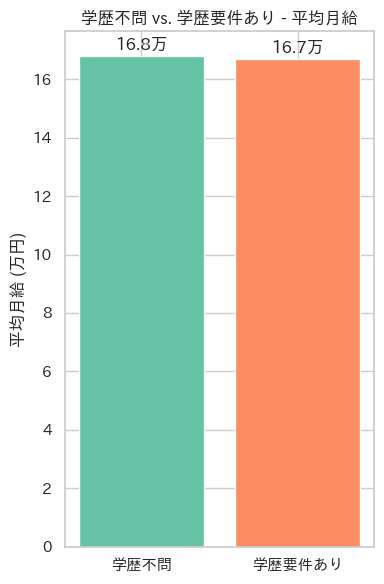

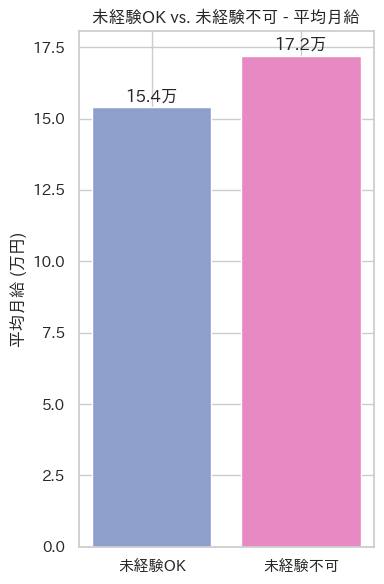

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_data():
    avg_no_education = 16.8 
    avg_with_education = 16.7 

    avg_inexperienced = 15.4 
    avg_experienced   = 17.2 

    fig, ax = plt.subplots(figsize=(4, 6))

    labels = ["学歴不問", "学歴要件あり"]
    values = [avg_no_education, avg_with_education]

    bars = ax.bar(labels, values, color=['#66c2a5', '#fc8d62'])
    ax.set_title("学歴不問 vs. 学歴要件あり - 平均月給")
    ax.set_ylabel("平均月給 (万円)")

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f"{height:.1f}万", ha="center", va="bottom")

    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(4, 6))

    labels = ["未経験OK", "未経験不可"]
    values = [avg_inexperienced, avg_experienced]

    bars = ax.bar(labels, values, color=['#8da0cb', '#e78ac3'])
    ax.set_title("未経験OK vs. 未経験不可 - 平均月給")
    ax.set_ylabel("平均月給 (万円)")

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f"{height:.1f}万", ha="center", va="bottom")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    visualize_data()

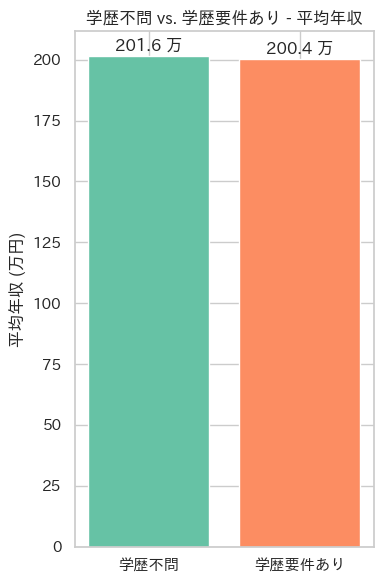

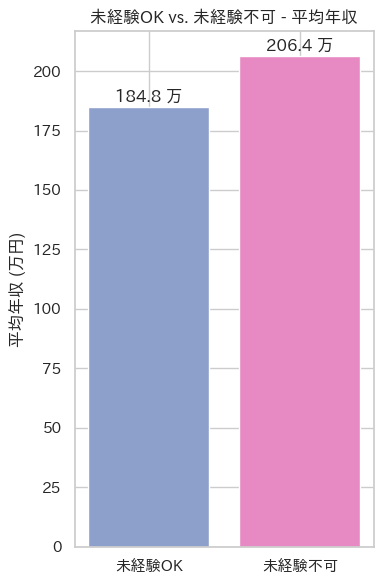

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_data():
    """
    先ほど main() の中で算出した平均月収を元に年収を算出してグラフ化するサンプル。
    """
    avg_no_education    = 16.8  
    avg_with_education  = 16.7  
    avg_inexperienced   = 15.4  
    avg_experienced     = 17.2  

    # --- ここで年収(万円)に換算 ---
    annual_no_education   = avg_no_education   * 12
    annual_with_education = avg_with_education * 12
    annual_inexperienced  = avg_inexperienced  * 12
    annual_experienced    = avg_experienced    * 12

    fig, ax = plt.subplots(figsize=(4, 6))

    labels = ["学歴不問", "学歴要件あり"]
    values = [annual_no_education, annual_with_education]

    bars = ax.bar(labels, values, color=['#66c2a5', '#fc8d62'])
    ax.set_title("学歴不問 vs. 学歴要件あり - 平均年収")
    ax.set_ylabel("平均年収 (万円)")

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, 
                f"{height:.1f} 万", ha="center", va="bottom")

    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(4, 6))

    labels = ["未経験OK", "未経験不可"]
    values = [annual_inexperienced, annual_experienced]

    bars = ax.bar(labels, values, color=['#8da0cb', '#e78ac3'])
    ax.set_title("未経験OK vs. 未経験不可 - 平均年収")
    ax.set_ylabel("平均年収 (万円)")

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1,
                f"{height:.1f} 万", ha="center", va="bottom")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    visualize_data()

In [ ]:
import pandas as pd
import sqlite3
from scipy import stats

def main():
    conn = sqlite3.connect("jobs.db")
    
    experienced_jobs_df = pd.read_sql_query("""
        SELECT average_income 
        FROM jobs
        WHERE is_inexperienced_ok = 0
    """, conn)

    inexperienced_jobs_df = pd.read_sql_query("""
        SELECT average_income 
        FROM jobs
        WHERE is_inexperienced_ok = 1
    """, conn)
    conn.close()

    experienced_salaries = experienced_jobs_df["average_income"].dropna().values
    inexperienced_salaries = inexperienced_jobs_df["average_income"].dropna().values

    if len(experienced_salaries) > 1 and len(inexperienced_salaries) > 1:
        
        t_stat, p_value = stats.ttest_ind(experienced_salaries, inexperienced_salaries)

        print("【未経験者と経験者の平均月収 t検定結果】")
    
        if p_value < 0.05:
            print("⇒ 両者の平均月収に統計的に有意な差があります。")
        else:
            print("⇒ 両者の平均月収に有意な差はありません。")
    else:
        print("サンプル数が不足しているため、t検定を実行できません。")

if __name__ == "__main__":
    main()

【未経験者と経験者の平均月収 t検定結果】
⇒ 両者の平均月収に統計的に有意な差があります。


In [ ]:
import sqlite3
import pandas as pd
from scipy import stats

def ttest_education_requirement(db_path="jobs.db"):
   
    conn = sqlite3.connect(db_path)
    
    no_edu_df = pd.read_sql_query("""
        SELECT average_income
        FROM jobs
        WHERE is_no_education_required = 1
          AND average_income IS NOT NULL
    """, conn)

    edu_required_df = pd.read_sql_query("""
        SELECT average_income
        FROM jobs
        WHERE is_no_education_required = 0
          AND average_income IS NOT NULL
    """, conn)
    
    conn.close()

    no_edu_salaries = no_edu_df["average_income"].dropna().values
    edu_salaries = edu_required_df["average_income"].dropna().values

    if len(no_edu_salaries) < 2 or len(edu_salaries) < 2:
        print("サンプル数が不足しているため、t検定を実行できません。")
        print(f"学歴不問サンプル数: {len(no_edu_salaries)}, 学歴要件ありサンプル数: {len(edu_salaries)}")
        return
    
    t_stat, p_value = stats.ttest_ind(no_edu_salaries, edu_salaries)
    
    print("====================================")
    print("【学歴不問 vs. 学歴要件あり】 t検定結果")
    print(f"  学歴不問サンプル数: {len(no_edu_salaries)}")
    print(f"  学歴要件ありサンプル数: {len(edu_salaries)}")
    print(f"  t統計量 (t-value) : {t_stat:.3f}")
    print(f"  p値 (p-value)     : {p_value:.6f}")
    
    if p_value < 0.05:
        print("⇒ 統計的に有意な差があります。(5%水準)")
    else:
        print("⇒ 統計的に有意な差はありません。(5%水準)")

if __name__ == "__main__":
    ttest_education_requirement("jobs.db")

【学歴不問 vs. 学歴要件あり】 t検定結果
  学歴不問サンプル数: 2277
  学歴要件ありサンプル数: 1075
  t統計量 (t-value) : 0.548
  p値 (p-value)     : 0.583999
⇒ 統計的に有意な差はありません。(5%水準)
